# Imports

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import preprocessing
from aux import *

import pandas as pd
pd.options.display.max_columns = 100

seed = 1997

# Lectura de datos

In [2]:
# Leemos la base de datos
col_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
for i in range(1,5):
    col_names.append('Wilderness_Area_' + str(i))
for i in range(1,41):
    col_names.append('Soil_Type_' + str(i))
col_names.append('Cover_Type')

dataset = pd.read_csv('covtype.data', header=None, names=col_names)

In [3]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
X = dataset.drop('Cover_Type', axis=1)
y = dataset['Cover_Type']
y.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

# Train, test, val split

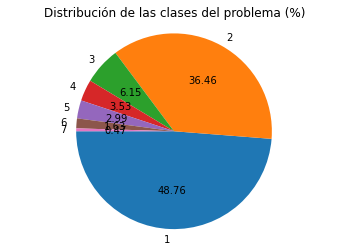

In [5]:
# Distribucion de las clases 
prop_class = y.value_counts(normalize=True)
pieLabels = ['1','2','3','4','5','6','7']
figureObject, axesObject = plt.subplots()
axesObject.pie(prop_class*100, labels=pieLabels, autopct='%1.2f', startangle=180)
axesObject.axis('equal')
plt.title("Distribución de las clases del problema (%)")
plt.show()

Separamos en train, vail y test.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=15120, stratify=y, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=11340, stratify=y_train, random_state=seed)

Número de elementos de cada clase en `train`.

In [7]:
y_train.value_counts()

2    5530
1    4135
3     698
7     400
6     339
5     185
4      53
Name: Cover_Type, dtype: int64

# Preprocesado

Definimos un `Pipeline` de preprocesado.

In [8]:
data_preprocess = Pipeline(
    [
        ("VT", VarianceThreshold()),
        ("Scaler", StandardScaler()),
        #("PCA", PCA(0.95)),
        #("Scaler2", StandardScaler()),
    ]
)

Preprocesamos el conjunto de entrenamiento y mostramos la matriz de correlación antes y después.

Matriz de correlación pre y post procesado (dígitos)


/usr/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


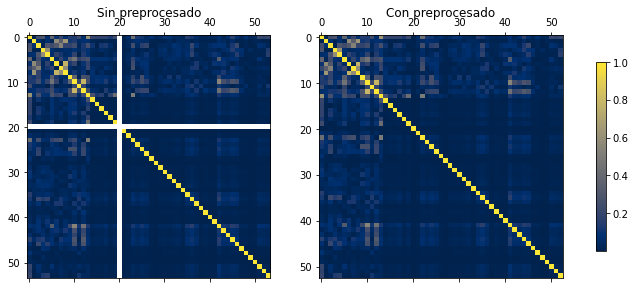

In [9]:
X_train_new = data_preprocess.fit_transform(X_train, y_train)
show_preprocess_correlation_matrix(X_train, X_train_new)

Preprocesamos validación y `test`.

In [10]:
X_train = X_train_new
X_val = data_preprocess.transform(X_val)
X_test = data_preprocess.transform(X_test)

# Modelos a considerar

Definimos un array con los modelos que vamos a considerar, se entrenarán y evaluarán en validación.

In [12]:
scorer = make_scorer(f1_score, average = "weighted")

In [13]:
linear_models = []
linear_models += [
    (
        "Logistic regresion: C={}".format(c),
        LogisticRegression(
            C=c, multi_class="ovr", penalty="l2", max_iter=1000, random_state=seed
        ),
    )
    for c in np.logspace(-5, 5, 11)
]
linear_models += [
    (
        "RidgeClassifier: \u03B1={}".format(a),
        RidgeClassifier(alpha=a, random_state=seed, max_iter=1000),
    )
    for a in np.logspace(-2, 2, 3)
]
linear_models += [
    (
        "Perceptron: \u03B1={}".format(a),
        Perceptron(alpha=a, penalty="l2", random_state=seed, max_iter=1000),
    )
    for a in np.logspace(-7, -3, 3)
]

In [14]:
knn_models = [
    (
        "{}-NN".format(k),
        KNeighborsClassifier(n_neighbors=k)
    )
    for k in [1,2,3]
]

In [15]:
svm_models = [
    (
        "SVM C={}".format(c),
        SVC(C = c)
    )
    for c in np.logspace(-3, 3, 7)
]

# Elección de modelo

Hacemos `K-fold cross-validation` sobre cada uno de los conjuntos de modelos: lineal, knn y SVM. Y seleccionamos el mejor de cada uno.

In [16]:
best_linear = kfold_models(linear_models, X_train, y_train, seed, 
                           scorer, stratified=True, verbose=True)

Los modelos que se van a considerar son: 
	 Logistic regresion: C=1e-05
	 Logistic regresion: C=0.0001
	 Logistic regresion: C=0.001
	 Logistic regresion: C=0.01
	 Logistic regresion: C=0.1
	 Logistic regresion: C=1.0
	 Logistic regresion: C=10.0
	 Logistic regresion: C=100.0
	 Logistic regresion: C=1000.0
	 Logistic regresion: C=10000.0
	 Logistic regresion: C=100000.0
	 RidgeClassifier: α=0.01
	 RidgeClassifier: α=1.0
	 RidgeClassifier: α=100.0
	 Perceptron: α=1e-07
	 Perceptron: α=1e-05
	 Perceptron: α=0.001


--> Logistic regresion: C=1e-05 <--
Score en K-fold: 0.320


--> Logistic regresion: C=0.0001 <--
Score en K-fold: 0.470


--> Logistic regresion: C=0.001 <--
Score en K-fold: 0.628


--> Logistic regresion: C=0.01 <--
Score en K-fold: 0.679


--> Logistic regresion: C=0.1 <--
Score en K-fold: 0.692


--> Logistic regresion: C=1.0 <--
Score en K-fold: 0.696


--> Logistic regresion: C=10.0 <--
Score en K-fold: 0.696


--> Logistic regresion: C=100.0 <--
Score en K-fold: 0.697


In [17]:
best_knn = kfold_models(knn_models, X_train, y_train, seed, scorer,
                        stratified=True, verbose=True)

Los modelos que se van a considerar son: 
	 1-NN
	 2-NN
	 3-NN


--> 1-NN <--
Score en K-fold: 0.764


--> 2-NN <--
Score en K-fold: 0.723


--> 3-NN <--
Score en K-fold: 0.746



Mejor modelo: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [18]:
best_svm = kfold_models(svm_models, X_train, y_train, seed, scorer,
                        stratified=True, verbose=True)

Los modelos que se van a considerar son: 
	 SVM C=0.001
	 SVM C=0.01
	 SVM C=0.1
	 SVM C=1.0
	 SVM C=10.0
	 SVM C=100.0
	 SVM C=1000.0


--> SVM C=0.001 <--
Score en K-fold: 0.320


--> SVM C=0.01 <--
Score en K-fold: 0.478


--> SVM C=0.1 <--
Score en K-fold: 0.661


--> SVM C=1.0 <--
Score en K-fold: 0.719


--> SVM C=10.0 <--
Score en K-fold: 0.754


--> SVM C=100.0 <--
Score en K-fold: 0.773


--> SVM C=1000.0 <--
Score en K-fold: 0.775



Mejor modelo: SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Entrenamos y evaluamos cada modelo en el conjunto de validación, quedandonos con el mejor de ellos en `best_model`.

In [23]:
best_model = 0
best_model_score = 0

models = [best_linear, best_knn, best_svm]

for model in models:
    print(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    val_score = f1_score(y_val, y_pred, average='weighted')
    print("Validation Score: ", val_score)
    if best_model_score < val_score:
        best_model_score = val_score
        best_model = model

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=1997, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Validation Score:  0.695390128591326
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Validation Score:  0.7712986062966758
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Validation Score:  0.7810709243635998


El mejor modelo ha resultado:

In [24]:
print(best_model)

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


# Predicción

Predecimos los valores de `test` con dicho modelo.

In [25]:
y_pred = best_model.predict(X_test)
print("F1-score obtenido:", f1_score(y_test, y_pred, average='weighted'))

F1-score obtenido: 0.7871899921273116


Mostramos la curva de aprendizaje obtenida por el modelo de la siguiente forma, empezamos tomando el $10\%$ del conjunto de `train` y hacemos `cross-validation` con dicho conjunto, repetimos el proceso aumentando el porcentage del conjunto utilizado hasta llegar al $100\%$.

<module 'matplotlib.pyplot' from '/usr/lib/python3.8/site-packages/matplotlib/pyplot.py'>

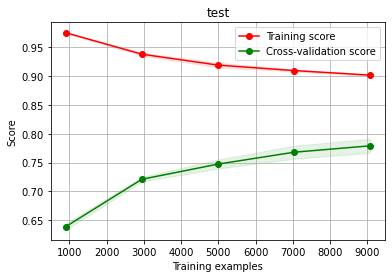

In [26]:
plot_learning_curve(best_model, "test", X_train, y_train)

Mostramos la matriz de confusión de los datos

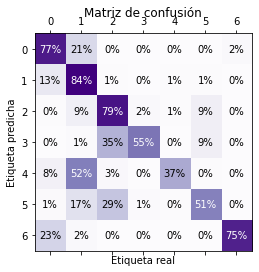

In [27]:
"""Muestra matriz de confusión de la base de datos de dígitos."""
show_confusion_matrix(y_test, y_pred, 7)